## Dataframe Basics

In [1]:
#import dependencies
from google.colab import drive
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import os

#mount google drive for easy access to files in Google Colab
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#load Fashion MNIST training and test data

training_file_path = '/content/drive/MyDrive/Colab Notebooks/Resources/fashion-mnist_train.csv'
test_file_path = '/content/drive/MyDrive/Colab Notebooks/Resources/fashion-mnist_test.csv'

df_train = pd.DataFrame(pd.read_csv(training_file_path))
df_test = pd.DataFrame(pd.read_csv(test_file_path))

In [3]:
#split image and class columns
X_test = df_test.iloc[:, 1:].values / 255
y_test = df_test.iloc[:, 0]
X_train = df_train.iloc[:, 1:].values / 255
y_train = df_train.iloc[:, 0]

#reshape images to be suitable for display
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

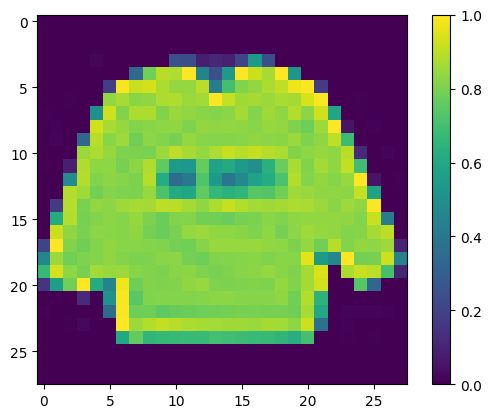

In [4]:
#visualize sample image

plt.figure()
plt.imshow(X_train[0].reshape(28,28))
plt.colorbar()
plt.grid(False)
plt.show()

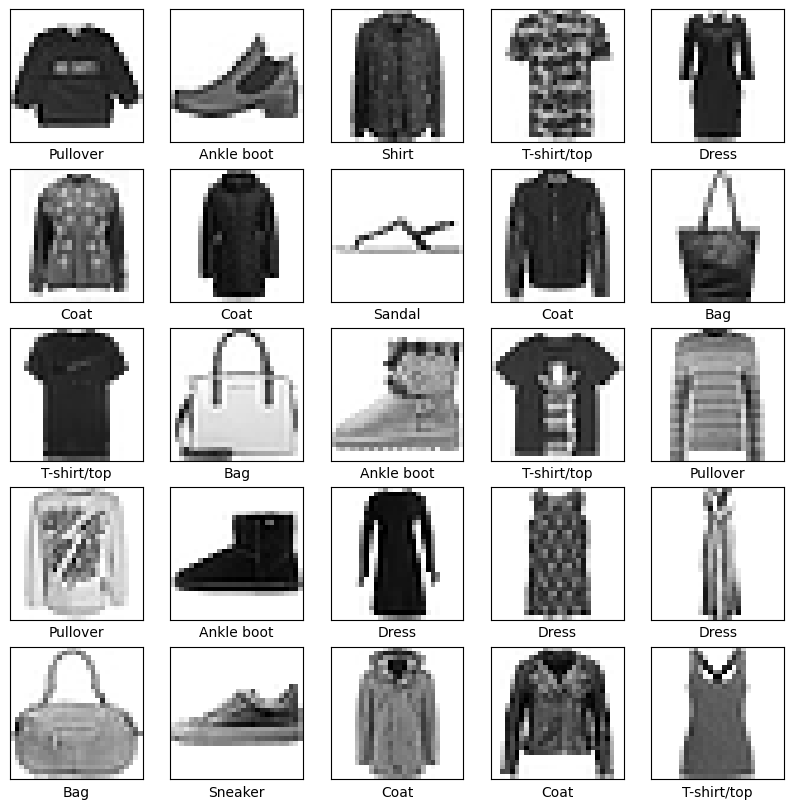

In [5]:
#set variable with class names for use in visuals
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
# First model iteration - basic two layer model to test concept
# Achieved 87% accuracy, but could go higher

# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(10)
# ])

In [ ]:
#Second model iteration - multilayer model
# Attempted to improve image recognition quality by adding deeper layers, but did not achieve desired results
# Achieved 83-85% accuracy - added layers were not suitable for image recognition

# Reshape data for MLP (flatten)
#X_train = X_train.reshape(X_train.shape[0], -1)  # Reshape to (samples, 784)
#X_test = X_test.reshape(X_test.shape[0], -1)    # Reshape to (samples, 784)
# model = tf.keras.Sequential([
#    tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
#    tf.keras.layers.Dropout(0.2),
#    tf.keras.layers.Dense(64, activation='relu'),
#    tf.keras.layers.Dense(10, activation='softmax')
# ])

In [6]:
#Third model iteration - convolutional neural network
#Researched layer types better suited for image recognition
#Chosen as final model after achieving 90% accuracy

# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
#compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
fit_model = model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.6528 - loss: 0.9627 - val_accuracy: 0.8237 - val_loss: 0.4715
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - accuracy: 0.8211 - loss: 0.4843 - val_accuracy: 0.8570 - val_loss: 0.3947
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.8483 - loss: 0.4072 - val_accuracy: 0.8762 - val_loss: 0.3469
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.8669 - loss: 0.3624 - val_accuracy: 0.8818 - val_loss: 0.3276
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.8758 - loss: 0.3346 - val_accuracy: 0.8876 - val_loss: 0.3137
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.8903 - loss: 0.2970 - val_accuracy: 0.8895 - val_loss: 0.3067
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 37ms/step - accuracy: 0.8994 - loss: 0.2718 - val_accuracy: 0.8967 - val_loss: 0.2835
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 35ms/step - accuracy: 0.9053 - loss: 0.2622 - val_accurac

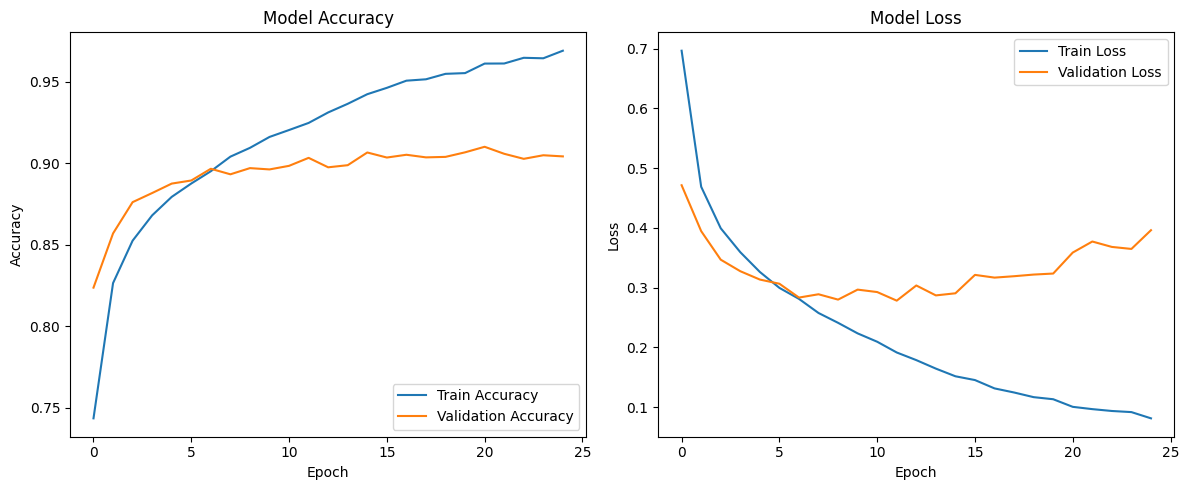

In [9]:
# Plotting the training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(fit_model.history['accuracy'], label='Train Accuracy')
plt.plot(fit_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(fit_model.history['loss'], label='Train Loss')
plt.plot(fit_model.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [10]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - 7ms/step - accuracy: 0.9043 - loss: 0.3963

Test accuracy: 0.9042999744415283


In [11]:
#Add softmax layer to convert the model's linear outputs to probabilities, making them easier to read
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [12]:
predictions = probability_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [13]:
#each prediction comes in the form of an array
#the array displays the model's confidence that the image corresponds to each of the 9 possible y values
# predictions[0]
confidences = [x for x in predictions[0]]
classes = list(range(0, 10))
res = "\n".join("{} {}".format(x, y) for x, y in zip(classes, confidences))
print(res)

0 0.23195554316043854
1 0.08533760160207748
2 0.08533778041601181
3 0.08533760905265808
4 0.08533760160207748
5 0.08533760160207748
6 0.08534333109855652
7 0.08533760160207748
8 0.08533760160207748
9 0.08533760160207748


In [14]:
#compare prediction to test value
print(f"Predicted Class:{class_names[np.argmax(predictions[0])]} \n Actual Class: {class_names[y_test[0]]}")

Predicted Class:T-shirt/top 
 Actual Class: T-shirt/top


In [15]:
#set up functions that will be used to plot images with their predicted and actual class values

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img.reshape(28,28), cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

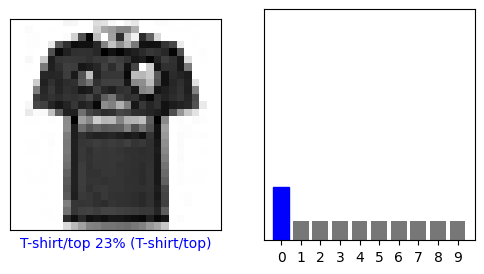

In [16]:
#visualize sample image, with predicted/actual class value and chart of prediction confidence array
#values in chart correspond to index in class_names

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], y_test)
plt.show()

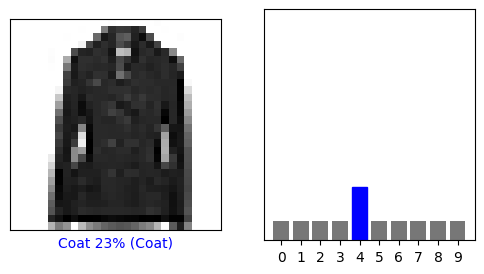

In [17]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

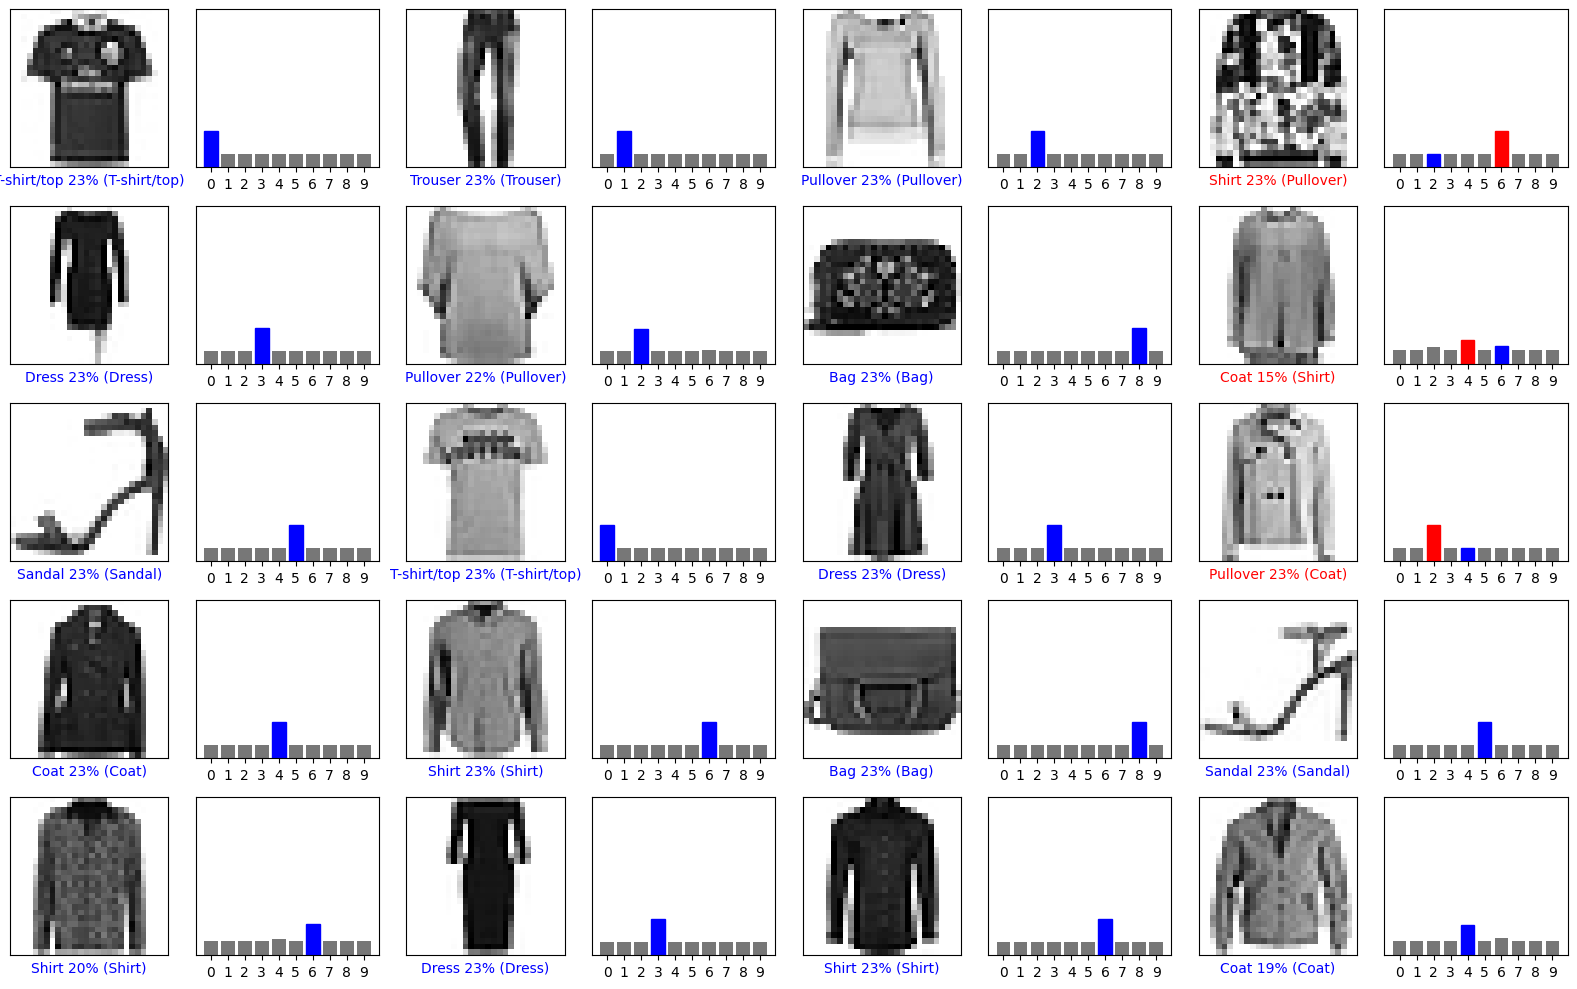

In [18]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

In [19]:
#function to convert images from outside of the Fashion MNIST dataset into Fashion MNIST format

def mnistify(filepath):
    # Read the image
    image = cv2.imread(filepath)

    # Convert to greyscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Get the original dimensions
    h, w = gray_image.shape

    # Calculate the scale factor to maintain aspect ratio
    scale = min(28 / h, 28 / w)
    new_size = (int(w * scale), int(h * scale))

    # Resize the image while maintaining aspect ratio
    resized_image = cv2.resize(gray_image, new_size)

    # Create a white background for the final image
    final_image = np.ones((28, 28), dtype=np.uint8) * 255

    # Calculate the position to center the resized image
    y_offset = (28 - new_size[1]) // 2
    x_offset = (28 - new_size[0]) // 2

    # Place the resized image on the white background
    final_image[y_offset:y_offset + new_size[1], x_offset:x_offset + new_size[0]] = resized_image

    # Invert the image (white background)
    inverted_image = 255 - final_image

    # Scale the pixel values to the range [0, 1]
    scaled_resized_image = inverted_image / 255.0

    return scaled_resized_image

In [20]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/Resources/clothing_images'

#Set empty list to hold images
demo_images = []

#iterate over files in clothing directory
#pass through mnistify and append to demo_images
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    demo_images.append(mnistify(file_path))
    print(file_path)

#reformat demo images for analysis
#print file names to ensure that we know what values to place in y_demo
demo_images = np.array(demo_images)
demo_images = demo_images.reshape(-1, 28, 28, 1)

/content/drive/MyDrive/Colab Notebooks/Resources/clothing_images/jeans.jpg
/content/drive/MyDrive/Colab Notebooks/Resources/clothing_images/dress.jpeg
/content/drive/MyDrive/Colab Notebooks/Resources/clothing_images/bag.jpeg
/content/drive/MyDrive/Colab Notebooks/Resources/clothing_images/coat.webp


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


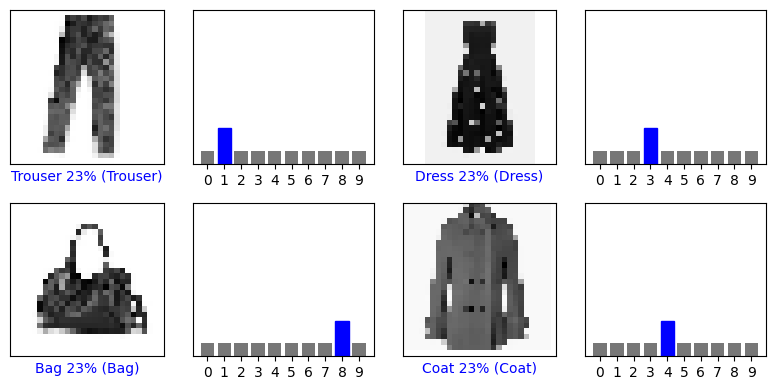

In [22]:
predictions = probability_model.predict(demo_images)
num_rows = 2
num_cols = 2
num_images = num_rows*num_cols
X_demo = demo_images

#colab does not always load images in the same order
#refer to the order that filepaths were displayed in the previous cell in order to assign y_demo values correctly
# {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}
y_demo = [1,3,8,4]
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_demo, X_demo)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_demo)
plt.tight_layout()
plt.show()